<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_0_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,27.648901,87.902601,0.096013,125.647515,125.464223,0.183292
1,0.0,1.0,65.012282,95.197327,-0.443171,169.766439,170.116398,-0.349960
2,0.0,2.0,62.053754,46.302357,0.159641,118.515752,118.373819,0.141933
3,0.0,3.0,30.567107,56.031187,0.814208,97.412502,96.584709,0.827793
4,0.0,4.0,32.729916,85.941258,-0.205068,128.466106,128.589839,-0.123733
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,24.456428,70.867756,-0.428216,104.895968,105.304210,-0.408242
119996,999.0,116.0,52.217457,27.256879,-0.096021,89.378315,89.496389,-0.118074
119997,999.0,117.0,62.596338,59.207832,-0.552344,131.251827,131.796308,-0.544482
119998,999.0,118.0,54.222279,57.886689,0.189870,122.298837,122.102117,0.196721


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,27.648901,87.902601,0.096013,125.647515,125.464223,0.183292
1,0.0,1.0,65.012282,95.197327,-0.443171,169.766439,170.116398,-0.349960
2,0.0,2.0,62.053754,46.302357,0.159641,118.515752,118.373819,0.141933
3,0.0,3.0,30.567107,56.031187,0.814208,97.412502,96.584709,0.827793
4,0.0,4.0,32.729916,85.941258,-0.205068,128.466106,128.589839,-0.123733
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,24.456428,70.867756,-0.428216,104.895968,105.304210,-0.408242
119996,999.0,116.0,52.217457,27.256879,-0.096021,89.378315,89.496389,-0.118074
119997,999.0,117.0,62.596338,59.207832,-0.552344,131.251827,131.796308,-0.544482
119998,999.0,118.0,54.222279,57.886689,0.189870,122.298837,122.102117,0.196721


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    27.648901  87.902601  0.096013  125.647515  125.464223  0.183292
      1.0    65.012282  95.197327 -0.443171  169.766439  170.116398 -0.349960
      2.0    62.053754  46.302357  0.159641  118.515752  118.373819  0.141933
      3.0    30.567107  56.031187  0.814208   97.412502   96.584709  0.827793
      4.0    32.729916  85.941258 -0.205068  128.466106  128.589839 -0.123733
...                ...        ...       ...         ...         ...       ...
999.0 115.0  24.456428  70.867756 -0.428216  104.895968  105.304210 -0.408242
      116.0  52.217457  27.256879 -0.096021   89.378315   89.496389 -0.118074
      117.0  62.596338  59.207832 -0.552344  131.251827  131.796308 -0.544482
      118.0  54.222279  57.886689  0.189870  122.298837  122.102117  0.196721
      119.0  65.243438  30.653922 -0.410407  105.486953  105.916573 -0.429620

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    27.648901  87.902601  0.096013  125.647515  125.464223  0.183292
      1.0    65.012282  95.197327 -0.443171  169.766439  170.116398 -0.349960
      2.0    62.053754  46.302357  0.159641  118.515752  118.373819  0.141933
      3.0    30.567107  56.031187  0.814208   97.412502   96.584709  0.827793
      4.0    32.729916  85.941258 -0.205068  128.466106  128.589839 -0.123733
...                ...        ...       ...         ...         ...       ...
999.0 115.0  24.456428  70.867756 -0.428216  104.895968  105.304210 -0.408242
      116.0  52.217457  27.256879 -0.096021   89.378315   89.496389 -0.118074
      117.0  62.596338  59.207832 -0.552344  131.251827  131.796308 -0.544482
      118.0  54.222279  57.886689  0.189870  122.298837  122.102117  0.196721
      119.0  65.243438  30.653922 -0.410407  105.486953  105.916573 -0.429620

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,27.648901,87.902601,0.096013,125.647515,125.464223,0.183292
1,0.0,1.0,65.012282,95.197327,-0.443171,169.766439,170.116398,-0.349960
2,0.0,2.0,62.053754,46.302357,0.159641,118.515752,118.373819,0.141933
3,0.0,3.0,30.567107,56.031187,0.814208,97.412502,96.584709,0.827793
4,0.0,4.0,32.729916,85.941258,-0.205068,128.466106,128.589839,-0.123733
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,24.456428,70.867756,-0.428216,104.895968,105.304210,-0.408242
119996,999.0,116.0,52.217457,27.256879,-0.096021,89.378315,89.496389,-0.118074
119997,999.0,117.0,62.596338,59.207832,-0.552344,131.251827,131.796308,-0.544482
119998,999.0,118.0,54.222279,57.886689,0.189870,122.298837,122.102117,0.196721


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    27.648901  87.902601  0.096013  125.647515  125.464223  0.183292
      1.0    65.012282  95.197327 -0.443171  169.766439  170.116398 -0.349960
      2.0    62.053754  46.302357  0.159641  118.515752  118.373819  0.141933
      3.0    30.567107  56.031187  0.814208   97.412502   96.584709  0.827793
      4.0    32.729916  85.941258 -0.205068  128.466106  128.589839 -0.123733
...                ...        ...       ...         ...         ...       ...
999.0 115.0  24.456428  70.867756 -0.428216  104.895968  105.304210 -0.408242
      116.0  52.217457  27.256879 -0.096021   89.378315   89.496389 -0.118074
      117.0  62.596338  59.207832 -0.552344  131.251827  131.796308 -0.544482
      118.0  54.222279  57.886689  0.189870  122.298837  122.102117  0.196721
      119.0  65.243438  30.653922 -0.410407  105.486953  105.916573 -0.429620

[120000 rows x 6 columns]

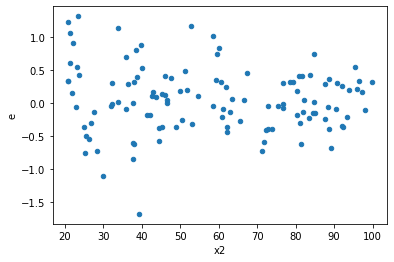

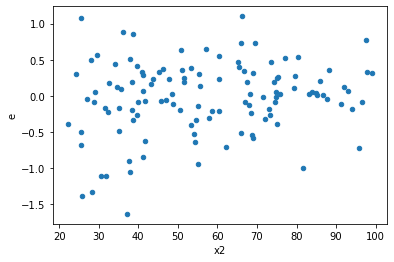

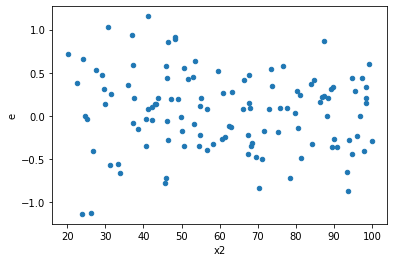

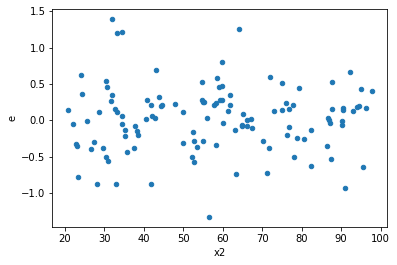

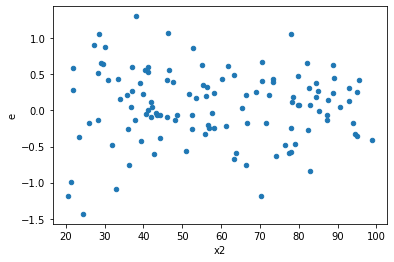

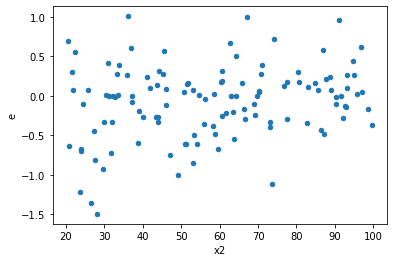

In [17]:
tablenew0 = table.loc[40.0]
tablenew1 = table.loc[67.0]
tablenew2 = table.loc[87.0]
tablenew3 = table.loc[121.0]
tablenew4 = table.loc[189.0]
tablenew5 = table.loc[201.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,46.0,46.0,7.1023812406501525,8.766555105020215,0.1543995921880468,0.1905772848917438,1.234312100122877,0.47809628463232867,0.7609518576838357,0.23904814231616434,Reject001=1 : Homoscedasticity
4.0,46.0,46.0,7.425785932534743,13.401241817286461,0.1614301289681466,0.2913313438540535,1.8046900272968192,0.04802466230384561,0.9759876688480772,0.024012331151922806,Reject001=1 : Homoscedasticity
6.0,46.0,46.0,8.31023867143131,10.831897253704357,0.18065736242241978,0.23547602725444253,1.3034399710975726,0.3721163272791821,0.813941836360409,0.18605816363959105,Reject001=1 : Homoscedasticity
7.0,46.0,46.0,9.962322142237493,10.169370355423279,0.21657222048342376,0.22107326859615825,1.0207831276914807,0.9446887739708472,0.5276556130145764,0.4723443869854236,Reject001=1 : Homoscedasticity
8.0,46.0,46.0,9.936575731745531,10.442504470249048,0.21601251590751155,0.22701096674454452,1.0509158036090005,0.8669839841203222,0.5665080079398389,0.4334919920601611,Reject001=1 : Homoscedasticity
11.0,46.0,46.0,8.44877837061484,8.462669939232724,0.18366909501336606,0.183971085635494,1.0016442103234948,0.9955789319058566,0.5022105340470717,0.4977894659529283,Reject001=1 : Homoscedasticity
13.0,46.0,46.0,7.7261787447058135,9.402780382213635,0.16796040749360464,0.20440826917855728,1.2170026986052678,0.5080630134491844,0.7459684932754078,0.2540315067245922,Reject001=1 : Homoscedasticity
16.0,46.0,46.0,7.20923418312308,8.050598899770685,0.15672248224180607,0.1750130195602323,1.1167065315505014,0.7097388202998711,0.6451305898500644,0.35486941014993556,Reject001=1 : Homoscedasticity
21.0,46.0,46.0,7.570481227395591,9.285790884076842,0.1645756788564259,0.2018650192190618,1.2265786817453552,0.49131048282208756,0.7543447585889562,0.24565524141104378,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,9.728820688438704,8.901809913747954,0.21149610192258053,0.1935176068206077,0.9149937283073237,0.7644953788993403,Reject001=1 : Homoscedasticity
1.0,46.0,46.0,10.37831326121866,6.90689141490637,0.2256155056786665,0.15014981336752978,0.6655119421684654,0.17108699239495137,Reject001=1 : Homoscedasticity
2.0,46.0,46.0,7.1023812406501525,8.766555105020215,0.1543995921880468,0.1905772848917438,1.234312100122877,0.47809628463232867,Reject001=1 : Homoscedasticity
3.0,46.0,46.0,11.215668506074572,8.2509491081812,0.2438188805668385,0.17936845887350433,0.7356627118314315,0.30142664142802084,Reject001=1 : Homoscedasticity
4.0,46.0,46.0,7.425785932534743,13.401241817286461,0.1614301289681466,0.2913313438540535,1.8046900272968192,0.04802466230384561,Reject001=1 : Homoscedasticity
5.0,46.0,46.0,12.15283897032603,8.612706728939747,0.26419215152882675,0.18723275497695102,0.708699156630781,0.2466608977476725,Reject001=1 : Homoscedasticity
6.0,46.0,46.0,8.31023867143131,10.831897253704357,0.18065736242241978,0.23547602725444253,1.3034399710975726,0.3721163272791821,Reject001=1 : Homoscedasticity
7.0,46.0,46.0,9.962322142237493,10.169370355423279,0.21657222048342376,0.22107326859615825,1.0207831276914807,0.9446887739708472,Reject001=1 : Homoscedasticity
8.0,46.0,46.0,9.936575731745531,10.442504470249048,0.21601251590751155,0.22701096674454452,1.0509158036090005,0.8669839841203222,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      960
Reject001=0 : Heteroscedasticity     40
Name: Result_test, dtype: int64